# Introduction

Well before starting I wanted you to give a quick outline of the notebook- 


This is a classic classification problem of iris-flower species.
In the given dataset we have to do the classification of Iris flower species into three species- Iris-Setosa,Iris-Versicolor and Iris-Virginica

Parameter used for the classification- SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm

Exploratory Data Analysis include finding distribution of species in among the sepal and petal parameters, correlation between them and so on

Classification models used are - Logistic Regression, Support Vector Machine, Decision Tree, Naive Bayes

Parameter used to define the accuracy of the model is accuracy score, since the dataset is too small using K-Fold cross validation is not worth it.
All the model performs very well on the training dataset, so there's not much too discuss

Well that's it, give your feedback.

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
sns.set()

# Importing the dataset

In [2]:
df = pd.read_csv(r"Iris.csv")

# EDA

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Dropping the Id Column
df.drop(["Id"], axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Sepal Area Plotting

f:\projects\python\privateprojects\dsandml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


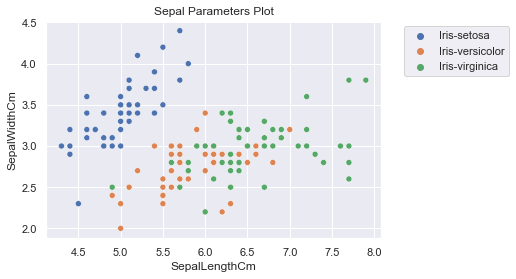

In [7]:
plt.title("Sepal Parameters Plot")
sns.scatterplot('SepalLengthCm', 'SepalWidthCm', data=df, hue='Species', palette="deep")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

### Petal Area Plotting

f:\projects\python\privateprojects\dsandml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


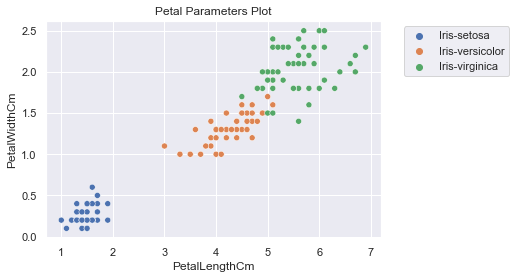

In [8]:
plt.title("Petal Parameters Plot")
sns.scatterplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species', palette="deep")
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

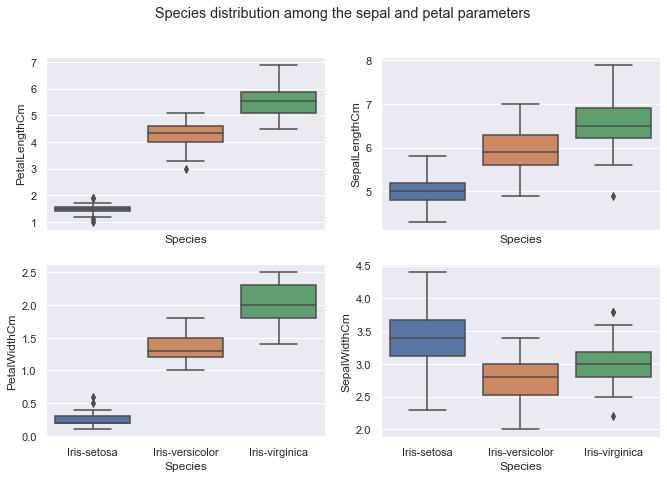

In [9]:
figure, axes = plt.subplots(2, 2,sharex=True,figsize=(11,7))
figure.suptitle('Species distribution among the sepal and petal parameters')
sns.boxplot(ax=axes[0, 0], x="Species",y="PetalLengthCm",data=df)
sns.boxplot(ax=axes[1, 0], x="Species",y="PetalWidthCm",data=df)
sns.boxplot(ax=axes[0, 1], x="Species",y="SepalLengthCm",data=df)
sns.boxplot(ax=axes[1, 1], x="Species",y="SepalWidthCm",data=df)
# axes[0].set_title('first chart with no data')
# axes[1].set_title('second chart with no data')

# Correlation - Heatmap of the features

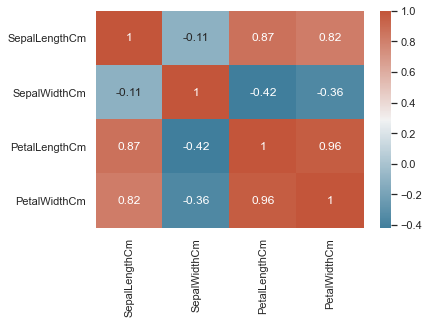

In [10]:
df_copy = df.copy()
df_copy = df_copy.drop(["Id","Species"],axis =1)
corr = df_copy.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True),annot=corr)
plt.show()

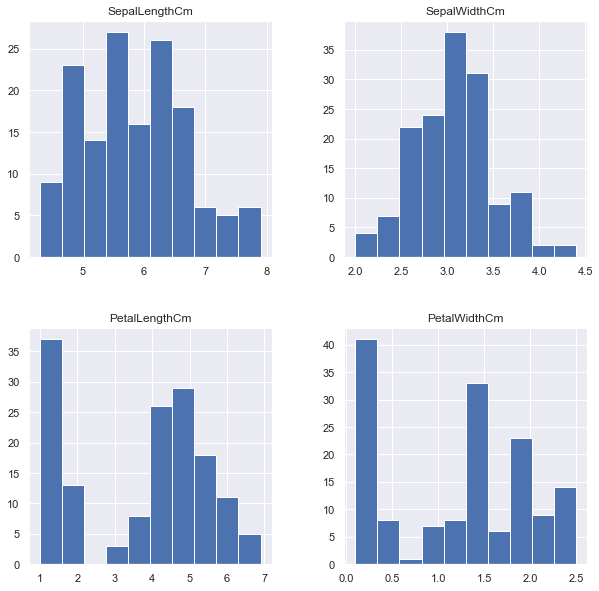

In [11]:
df_copy.hist(figsize=(10,10))
plt.show()

# Data Preprocessing

In [12]:
# Encoding the categorical data
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

## Splitting the data into training-test data

Here I am only using petal length and width for training the ml models because of their continuos distribution over the different species and the correlation between sepal parameter is low and on the other side the correlation between petal parameter is high , this a fair observation anyone can make after different iterations of model parameter tuning. 

In [13]:
X = df.iloc[:, 3:5].values
y = df.iloc[:, -1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

## Feature Scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Training and Evaluating different ML models

## Logistic Regression Classifier

In [15]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,y_train)
y_pred_lrc = lr_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred_lrc.reshape(len(y_pred_lrc),1)),1))
accuracy_lrc_model = accuracy_score(y_test, y_pred_lrc)
print(f"Accuracy Score of Logistic Regression Classifier Model: {accuracy_lrc_model}")

[[2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [1 1]]
Accuracy Score of Logistic Regression Classifier Model: 0.8666666666666667
f:\projects\python\privateprojects\dsandml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Support Vector Classifier

In [16]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred_svc.reshape(len(y_pred_svc),1)),1))
accuracy_SVC_model = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy Score of Support Vector Classifier Model: {accuracy_SVC_model}")

[[2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [1 1]]
Accuracy Score of Support Vector Classifier Model: 0.9
f:\projects\python\privateprojects\dsandml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred_dt.reshape(len(y_pred_dt),1)),1))
dt_acc = accuracy_score(y_test,y_pred_dt)
print(f"Accuracy Score of Descion Tree Classifier Model: {dt_acc}")

[[2 2]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [2 1]
 [2 1]
 [2 1]
 [1 1]
 [2 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 1]
 [2 2]
 [2 2]
 [2 1]
 [1 0]]
Accuracy Score of Descion Tree Classifier Model: 0.7


## Naive Bayes Classifier

In [18]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred_nb = naive_bayes.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred_nb.reshape(len(y_pred_nb),1)),1))
naive_bayes_acc = accuracy_score(y_test,y_pred_nb)
print(f"Accuracy Score of Naive Bayes Classifier Model: {dt_acc}")

[[2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [1 1]]
Accuracy Score of Naive Bayes Classifier Model: 0.7
f:\projects\python\privateprojects\dsandml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Accuracy Score

In [19]:
dict_model = {"Logistic Regression":accuracy_lrc_model,"Support Vector":accuracy_SVC_model,"Decision Tree":dt_acc,"Naive Bayes":naive_bayes_acc}

In [20]:
model_eval = pd.DataFrame()
model_eval.insert(loc = 0,column="Model",value=list(dict_model.keys()))
model_eval.insert(loc=1,column="Accuracy",value=list(dict_model.values()))

In [21]:
print(model_eval)

                 Model  Accuracy
0  Logistic Regression  0.866667
1       Support Vector  0.900000
2        Decision Tree  0.700000
3          Naive Bayes  0.900000


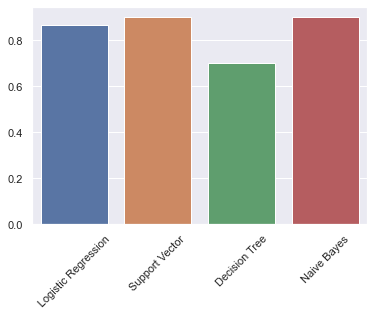

In [22]:

sns.barplot(x=list(model_eval["Model"].values),y=list(model_eval["Accuracy"].values))
plt.xticks(rotation=45)
plt.show()